<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/lineas_verticales_hora_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


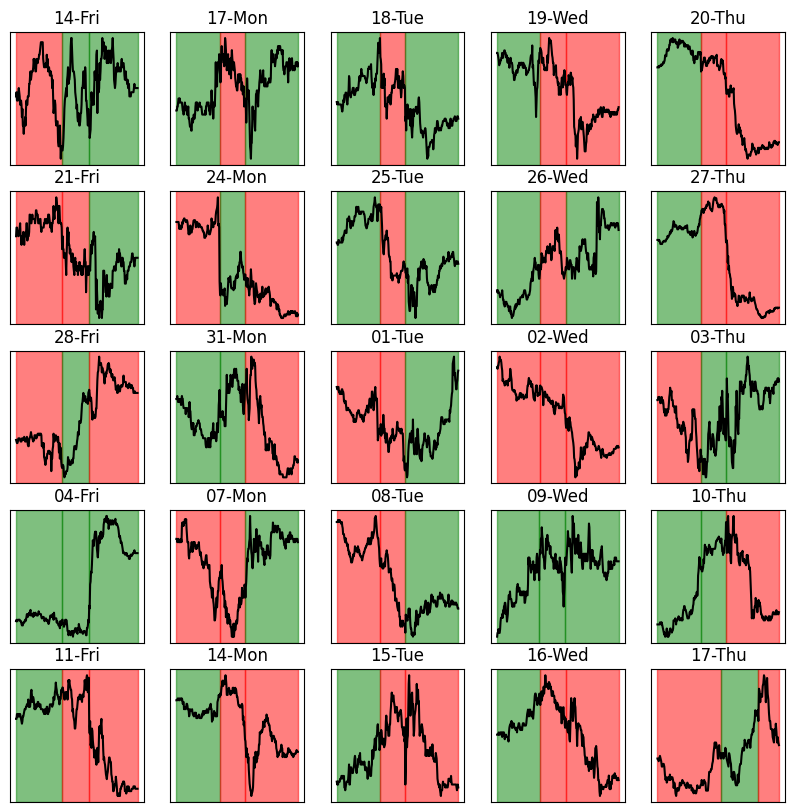

In [16]:
import yfinance as yf
import pandas as pd
from pylab import *

# Descargar y formatear los datos
datos = pd.DataFrame(yf.download("EURUSD=X", interval="5m", period="25d").Close)
datos.index = pd.to_datetime(datos.index).strftime("%Y-%m-%d %H:%M")
datos["time"] = pd.to_datetime(datos.index).strftime("%H:%M")
datos.index = pd.to_datetime(datos.index).strftime("%Y-%m-%d")

lista_dias = datos.index.unique()
dia = [datos.loc[lista_dias[i]].set_index("time").groupby("time").mean() for i in range(len(lista_dias))]

mensual = figure(figsize=(10, 10))
for i in range(len(lista_dias)):
    maximo, minimo = max(dia[i].Close), min(dia[i].Close)

    subplot(5, 5, i + 1, frameon=True, xticks=[], yticks=[])
    plot(dia[i].Close, color="k")
    title(pd.to_datetime(lista_dias[i]).strftime("%d-%a"))

    apertura_londres = "08:30"
    apertura_ny = "13:30"

    # Calcular los precios de cierre para cada intervalo
    precio_londres = dia[i].Close[apertura_londres]
    precio_ny = dia[i].Close[apertura_ny]

    # Establecer el color de fondo para cada intervalo
    color_intervalo1 = "green" if dia[i].Close[dia[i].index[0]] < precio_londres else "red"
    color_intervalo2 = "green" if precio_londres < precio_ny else "red"
    color_intervalo3 = "green" if precio_ny < dia[i].Close[-1] else "red"

    axvspan(dia[i].index[0], apertura_londres, color=color_intervalo1, alpha=0.5)
    axvspan(apertura_londres, apertura_ny, color=color_intervalo2, alpha=0.5)
    axvspan(apertura_ny, dia[i].index[-1], color=color_intervalo3, alpha=0.5)

show()


In [14]:
dia[-1]

,Close
time,
00:00,1.088139
00:05,1.088139
00:10,1.088021
00:15,1.088139
00:20,1.088258
...,...
15:55,1.089325
16:00,1.088850
16:05,1.089087
